# Chapter 2 - Flows on the Line

In [1]:
import matplotlib.pyplot as plt
import numpy as np

/var/folders/hb/ndq4xgw56y777czh0sk97vcw0000gn/T/ipykernel_3288/4186149162.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(x - 0.5 * direction, 0, 0.001 * direction, 0, head_width=0.1, head_length=1, edgecolor='None', color='black')


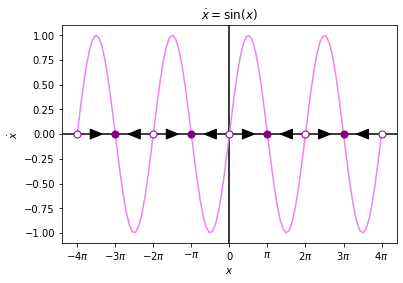

In [2]:
x = np.linspace(-4 * np.pi, 4 * np.pi, 100)
x_dot = np.sin(x)

plt.plot(x, x_dot, color='violet')

plt.axhline(color="black", zorder=-1)
plt.axvline(color="black", zorder=-1)
plt.ylabel("$\dot{x}$")
plt.xlabel("$x$")
plt.title("$\dot{x} = \sin(x)$")
plt.xticks(np.linspace(-4 * np.pi, 4 * np.pi, 9), labels=["$-4\pi$", "$-3\pi$", "$-2\pi$", "$-\pi$", "$0$", "$\pi$", "$2\pi$", "$3\pi$", "$4\pi$"])

# Arrow heads
for x in np.linspace(-3.5 * np.pi, 3.5 * np.pi, 8):
  direction = 1 if np.sin(x) > 0 else -1
  plt.arrow(x - 0.5 * direction, 0, 0.001 * direction, 0, head_width=0.1, head_length=1, edgecolor='None', color='black')

# Dots
plt.scatter(np.linspace(-4 * np.pi, 4 * np.pi, 5), np.zeros((5, )), s=50, c='white', edgecolors='purple', zorder=10)
plt.scatter(np.linspace(-3 * np.pi, 3 * np.pi, 4), np.zeros((4, )), s=50, c='purple', zorder=10)

plt.show()

/var/folders/hb/ndq4xgw56y777czh0sk97vcw0000gn/T/ipykernel_3288/1506932562.py:18: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(K/2, 0, 0.001, 0, head_width=3, head_length=5, edgecolor='None', color='black')
/var/folders/hb/ndq4xgw56y777czh0sk97vcw0000gn/T/ipykernel_3288/1506932562.py:19: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(K * 1.15, 0, -0.001, 0, head_width=3, head_length=5, edgecolor='None', color='black')


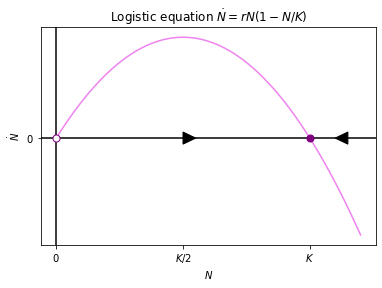

In [3]:
K = 100
r = 1
n = np.linspace(0, K * 1.2, 150)
n_dot = n * r * (1 - n / K)

plt.plot(n, n_dot, color='violet')

plt.axhline(color="black", zorder=-1)
plt.axvline(color="black", zorder=-1)
plt.ylabel("$\dot{N}$")
plt.xlabel("$N$")
plt.title("Logistic equation $\dot{N} = rN (1 - N/K)$")
plt.xticks([0, K/2, K], ["$0$", "$K/2$", "$K$"])
plt.yticks([0], ["$0$"])

plt.scatter([0], [0], s=50, c='white', edgecolor='purple', zorder=10)
plt.scatter([K], [0], s=50, c='purple', zorder=10)
plt.arrow(K/2, 0, 0.001, 0, head_width=3, head_length=5, edgecolor='None', color='black')
plt.arrow(K * 1.15, 0, -0.001, 0, head_width=3, head_length=5, edgecolor='None', color='black')

plt.show()


In [4]:
from typing import Callable, Tuple

FirstOrderDiffEqn = Callable[[float], float]
StepFunction = Callable[[FirstOrderDiffEqn, float, float], float]
SolverFunction = Callable[[FirstOrderDiffEqn, float, float, float], Tuple[float, float]]

def num_sol_generator(step_fn: StepFunction, cutoff_limit: float = 1e-4, max_iterations: int = 1e6) -> SolverFunction:
  assert max_iterations > 0, "max_iterations must be positive"

  def solver(fn: FirstOrderDiffEqn, x_0: float = 0.0, t_step: float = 0.1, abs_max_limit: float = 100.0) -> Tuple[float, float]:
    assert t_step > 0, "t_step must be positive"

    t = [0]
    x = [x_0]
    x_diff = np.inf
    iteration_count = 0
    
    while((x_diff > cutoff_limit) & (iteration_count < max_iterations)):
      x_n = x[-1]
      t_next = t[-1] + t_step
      x_next = step_fn(fn, x_n, t_step)

      t.append(t_next)

      if(np.abs(x_next) > abs_max_limit):
        x.append(np.sign(x_next) * abs_max_limit)
        break

      x.append(x_next)
      x_diff = np.abs(x_next - x_n)

      iteration_count += 1

    return (t, x)
  return solver

In [5]:
def num_sol_euler_step(fn: FirstOrderDiffEqn, x_n: float = 0.0, t_step: float = 0.01) -> float:
  return x_n + fn(x_n) * t_step

num_sol_euler = num_sol_generator(num_sol_euler_step)

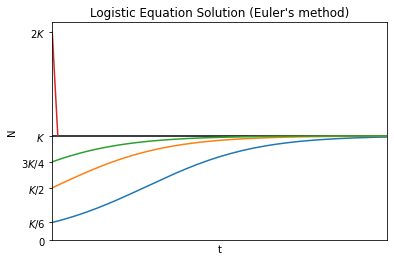

In [6]:
K = 100
r = 1
logistic_fn: FirstOrderDiffEqn = lambda n: n * r * (1 - n / K)

t1, N1 = num_sol_euler(logistic_fn, K/6)
t2, N2 = num_sol_euler(logistic_fn, K/2)
t3, N3 = num_sol_euler(logistic_fn, 3*K/4)
t4, N4 = num_sol_euler(logistic_fn, 2*K)

plt.plot(t1, N1, t2, N2, t3, N3, t4, N4)
plt.xlim(0, 6)
plt.axhline(100, color='black', zorder=-100)
plt.xlabel("t")
plt.xticks([])
plt.ylabel("N")
plt.yticks([0, K/6, K/2, 3 * K/4, K, 2 * K], ["$0$", "$K/6$", "$K/2$", "$3K/4$", "$K$", "$2K$"])
plt.title("Logistic Equation Solution (Euler's method)")

plt.show()

In [7]:
def num_sol_runge_kutta_step(fn: FirstOrderDiffEqn, x_n: float, t_step: float) -> float:
  k_1 = fn(x_n) * t_step
  k_2 = fn(x_n + 0.5 * k_1) * t_step
  k_3 = fn(x_n + 0.5 * k_2) * t_step
  k_4 = fn(x_n + k_3) * t_step

  return x_n + (k_1 + 2 * k_2 + 2 * k_3 + k_4) / 6

num_sol_runge_kutta = num_sol_generator(num_sol_runge_kutta_step)

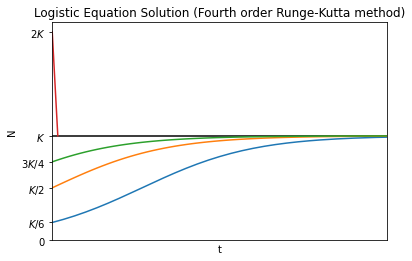

In [87]:
K = 100
r = 1
logistic_fn: FirstOrderDiffEqn = lambda n: n * r * (1 - n / K)

t1, N1 = num_sol_runge_kutta(logistic_fn, K/6)
t2, N2 = num_sol_runge_kutta(logistic_fn, K/2)
t3, N3 = num_sol_runge_kutta(logistic_fn, 3*K/4)
t4, N4 = num_sol_runge_kutta(logistic_fn, 2*K)

plt.plot(t1, N1, t2, N2, t3, N3, t4, N4)
plt.xlim(0, 6)
plt.axhline(100, color='black', zorder=-100)
plt.xlabel("t")
plt.xticks([])
plt.ylabel("N")
plt.yticks([0, K/6, K/2, 3 * K/4, K, 2 * K], ["$0$", "$K/6$", "$K/2$", "$3K/4$", "$K$", "$2K$"])
plt.title("Logistic Equation Solution (Fourth order Runge-Kutta method)")

plt.show()